<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-EDA" data-toc-modified-id="1.-EDA-1">1. EDA</a></span><ul class="toc-item"><li><span><a href="#1.1-Valeurs-manquantes" data-toc-modified-id="1.1-Valeurs-manquantes-1.1">1.1 Valeurs manquantes</a></span></li><li><span><a href="#1.2-Extraction-des-colonnes-pertinentes" data-toc-modified-id="1.2-Extraction-des-colonnes-pertinentes-1.2">1.2 Extraction des colonnes pertinentes</a></span></li><li><span><a href="#1.3-Répartition-des-catégories-de-produit" data-toc-modified-id="1.3-Répartition-des-catégories-de-produit-1.3">1.3 Répartition des catégories de produit</a></span></li><li><span><a href="#1.4-Exemples-d'image" data-toc-modified-id="1.4-Exemples-d'image-1.4">1.4 Exemples d'image</a></span></li><li><span><a href="#1.5-Analyse-des-descriptions-des-produits" data-toc-modified-id="1.5-Analyse-des-descriptions-des-produits-1.5">1.5 Analyse des descriptions des produits</a></span></li></ul></li><li><span><a href="#2.-Données-textuelles" data-toc-modified-id="2.-Données-textuelles-2">2. Données textuelles</a></span><ul class="toc-item"><li><span><a href="#2.1-Preprocessing" data-toc-modified-id="2.1-Preprocessing-2.1">2.1 Preprocessing</a></span></li><li><span><a href="#2.2-Segmentation" data-toc-modified-id="2.2-Segmentation-2.2">2.2 Segmentation</a></span><ul class="toc-item"><li><span><a href="#2.2.1-Méthode-BOW" data-toc-modified-id="2.2.1-Méthode-BOW-2.2.1">2.2.1 Méthode BOW</a></span></li><li><span><a href="#2.2.2-Méthode-TF-IDF" data-toc-modified-id="2.2.2-Méthode-TF-IDF-2.2.2">2.2.2 Méthode TF-IDF</a></span></li><li><span><a href="#2.2.3-Méthode-BOW-LDA" data-toc-modified-id="2.2.3-Méthode-BOW-LDA-2.2.3">2.2.3 Méthode BOW-LDA</a></span></li><li><span><a href="#2.2.4--Méthode-TF-IDF-+-NMF" data-toc-modified-id="2.2.4--Méthode-TF-IDF-+-NMF-2.2.4">2.2.4  Méthode TF-IDF + NMF</a></span></li></ul></li></ul></li><li><span><a href="#3.-Image-Data" data-toc-modified-id="3.-Image-Data-3">3. Image Data</a></span><ul class="toc-item"><li><span><a href="#3.1-Bag-Of-Visual-Words" data-toc-modified-id="3.1-Bag-Of-Visual-Words-3.1">3.1 Bag Of Visual Words</a></span><ul class="toc-item"><li><span><a href="#3.1.1-Preprocessing" data-toc-modified-id="3.1.1-Preprocessing-3.1.1">3.1.1 Preprocessing</a></span></li><li><span><a href="#3.1.2-Extraction-des-features" data-toc-modified-id="3.1.2-Extraction-des-features-3.1.2">3.1.2 Extraction des features</a></span></li><li><span><a href="#3.1.3-Stacking" data-toc-modified-id="3.1.3-Stacking-3.1.3">3.1.3 Stacking</a></span></li></ul></li><li><span><a href="#3.2-Transfer-Learning-1" data-toc-modified-id="3.2-Transfer-Learning-1-3.2">3.2 Transfer Learning 1</a></span><ul class="toc-item"><li><span><a href="#3.2.1-Extraction-des-features" data-toc-modified-id="3.2.1-Extraction-des-features-3.2.1">3.2.1 Extraction des features</a></span></li><li><span><a href="#3.2.2-Réduction" data-toc-modified-id="3.2.2-Réduction-3.2.2">3.2.2 Réduction</a></span></li><li><span><a href="#3.2.3-Clustering" data-toc-modified-id="3.2.3-Clustering-3.2.3">3.2.3 Clustering</a></span></li><li><span><a href="#3.2.4-Visualisation" data-toc-modified-id="3.2.4-Visualisation-3.2.4">3.2.4 Visualisation</a></span></li></ul></li><li><span><a href="#3.3-Transfer-Learning-2" data-toc-modified-id="3.3-Transfer-Learning-2-3.3">3.3 Transfer Learning 2</a></span></li></ul></li><li><span><a href="#4.-Résultats" data-toc-modified-id="4.-Résultats-4">4. Résultats</a></span><ul class="toc-item"><li><span><a href="#4.1-ARI" data-toc-modified-id="4.1-ARI-4.1">4.1 ARI</a></span></li><li><span><a href="#4.2-Matrice-de-confusion" data-toc-modified-id="4.2-Matrice-de-confusion-4.2">4.2 Matrice de confusion</a></span></li><li><span><a href="#4.3-Affichage-des-images-sur-la-projection-t-SNE" data-toc-modified-id="4.3-Affichage-des-images-sur-la-projection-t-SNE-4.3">4.3 Affichage des images sur la projection t-SNE</a></span></li></ul></li></ul></div>

In [1]:
# Packages courants
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from pylab import figure, text, scatter, show
import os
from os import listdir
import re

# Clustering
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans, vq

# Pipeline
from sklearn.pipeline import Pipeline

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Cross-validation et hyperparamétrisation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold

# Traitement d'images
import cv2 
from PIL import Image, ImageOps
from PIL import ImageFilter
from glob import glob
from PIL import Image as PImage
import matplotlib.image as mpimg

# Réduction de dimensions et topic modelling
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import PCA

# Métriques 
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import confusion_matrix

# Traitement des données textuelles
import nltk
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
import unicodedata 
import inflect
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Keras 
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

Using TensorFlow backend.
C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

# 1. EDA

In [2]:
# Chemin d'accès aux images
path = r"C:/Users/valen/images"

# Lecture du dataset
df = pd.read_csv(r"C:\Users\valen\Desktop\Formation Data Scientist\P6\Données\Flipkart\flipkart_com-ecommerce_sample_1050.csv", )

In [3]:
df.head(1)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."


In [4]:
# Structure des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

## 1.1 Valeurs manquantes

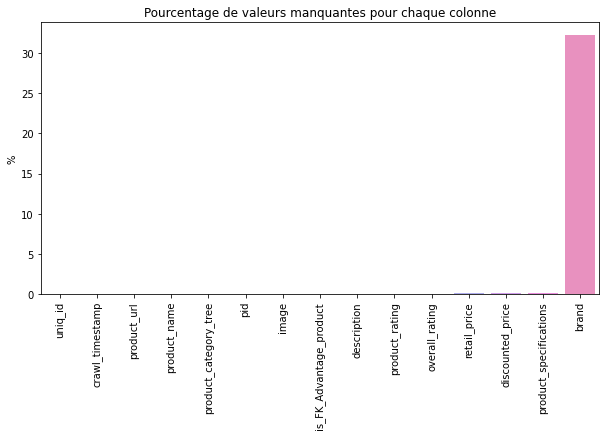

In [5]:
# Calcul des valeurs manquantes
null_prop = df.isna().sum(axis=0).sort_values()/len(df)*100

# Plot des données manquants par colonne
fig = plt.figure(figsize=(10, 5))
sns.barplot(x=null_prop.index, y=null_prop.values)
plt.ylabel("%")
plt.title("Pourcentage de valeurs manquantes pour chaque colonne")
plt.style.use('ggplot')
plt.xticks(rotation=90)
plt.show()

In [6]:
# Les valeurs manquantes pour la variable "brand" sont remplacés par "".
df["brand"].fillna("", inplace=True)

Toutes les informations textes à notre disposition sont rassemblés dans une unique chaine de caractères. Sont donc regroupés le nom du produit, la marque ainsi que la description du produit

In [7]:
df['description'] = df["product_name"] + df["brand"] + df["description"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    1050 non-null   object 
 14  product_specifications  

## 1.2 Extraction des colonnes pertinentes

In [8]:
# Travail sur les variables description et catégorie
description_category = df[['product_category_tree','description']]
description_category['product_category_tree'] = description_category['product_category_tree'].apply(lambda x: x.split(' >> '))
print(description_category.shape)
description_category.head()

(1050, 2)


C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,product_category_tree,description
0,"[[""Home Furnishing, Curtains & Accessories, Cu...",Elegance Polyester Multicolor Abstract Eyelet ...
1,"[[""Baby Care, Baby Bath & Skin, Baby Bath Towe...",Sathiyas Cotton Bath TowelSathiyasSpecificatio...
2,"[[""Baby Care, Baby Bath & Skin, Baby Bath Towe...",Eurospa Cotton Terry Face Towel SetEurospaKey ...
3,"[[""Home Furnishing, Bed Linen, Bedsheets, SANT...",SANTOSH ROYAL FASHION Cotton Printed King size...
4,"[[""Home Furnishing, Bed Linen, Bedsheets, Jaip...",Jaipur Print Cotton Floral King sized Double B...


In [9]:
# Catégories du premier produit
print(df['product_category_tree'][0])

["Home Furnishing >> Curtains & Accessories >> Curtains >> Elegance Polyester Multicolor Abstract Eyelet Do..."]


Chaque image est catégorisé par un système d'arbres avec plusieurs profondeurs. Le nom de la colonne renseignant les catégories est 'product_category_tree'

In [10]:
# Extracation des catégories
columns = ['category_1', 'category_2', 'category_3']
cat = description_category['product_category_tree'].to_list()
cat = pd.DataFrame(cat)
cat = cat.loc[:,0:2]
cat.columns = columns

cat["category_1"] = [re.sub(r'[\[\"\]]', '',w.strip()) for w in cat["category_1"]]
cat["category_2"] = [re.sub(r'[\[\"\]]', '',w.strip()) for w in cat["category_2"]]
cat["category_2"] = [re.sub(r'[\[\"\]]', '',str(w).strip()) for w in cat["category_2"]]

print(cat.shape)
cat.head(5)

(1050, 3)


,category_1,category_2,category_3
0,Home Furnishing,Curtains & Accessories,Curtains
1,Baby Care,Baby Bath & Skin,Baby Bath Towels
2,Baby Care,Baby Bath & Skin,Baby Bath Towels
3,Home Furnishing,Bed Linen,Bedsheets
4,Home Furnishing,Bed Linen,Bedsheets


In [11]:
# Nombre de catégories uniques
for col in cat.columns:
    print('{} catégories uniques dans {}'.format(cat[col].nunique(), col))

7 catégories uniques dans category_1
62 catégories uniques dans category_2
246 catégories uniques dans category_3


La catégorie 3 est retirée : cardinalité trop élevée

In [12]:
# Retrait de la colonne catégorie 3 et ajout colonne image
cat = cat.drop(columns = ['category_3'])
data = (cat.join(description_category['description']).join(df['image']))
print(data.shape)
data.head(5)

(1050, 4)


,category_1,category_2,description,image
0,Home Furnishing,Curtains & Accessories,Elegance Polyester Multicolor Abstract Eyelet ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,Baby Care,Baby Bath & Skin,Sathiyas Cotton Bath TowelSathiyasSpecificatio...,7b72c92c2f6c40268628ec5f14c6d590.jpg
2,Baby Care,Baby Bath & Skin,Eurospa Cotton Terry Face Towel SetEurospaKey ...,64d5d4a258243731dc7bbb1eef49ad74.jpg
3,Home Furnishing,Bed Linen,SANTOSH ROYAL FASHION Cotton Printed King size...,d4684dcdc759dd9cdf41504698d737d8.jpg
4,Home Furnishing,Bed Linen,Jaipur Print Cotton Floral King sized Double B...,6325b6870c54cd47be6ebfbffa620ec7.jpg


## 1.3 Répartition des catégories de produit

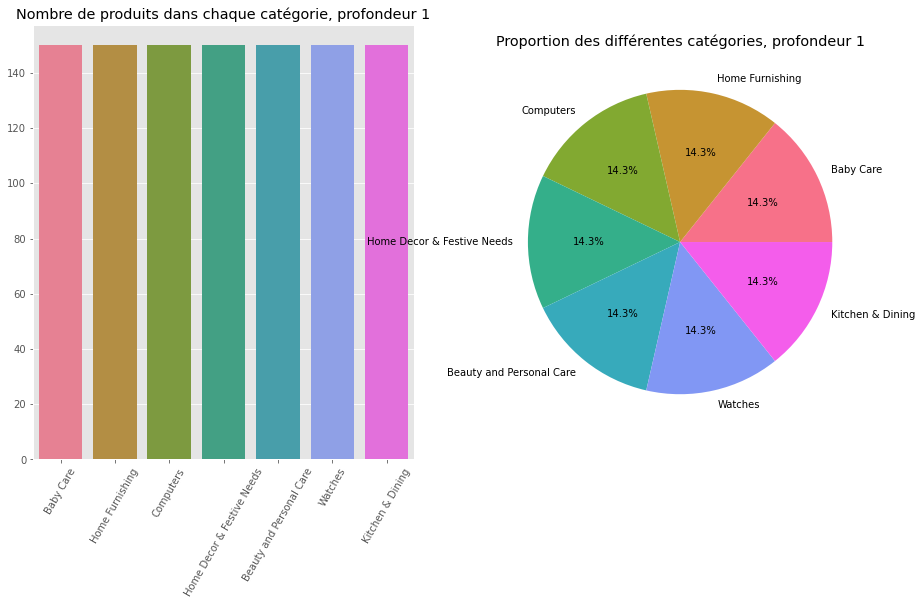

In [13]:
# Histogramme et Pieplot de la répartition des catégories dans la profondeur 1 : category_1
fig = plt.figure(1, figsize=(15, 8))
categories_1 = data["category_1"].value_counts()
plt.title("Proportion des différentes catégories")

sns.set_palette(sns.color_palette("husl", len(categories_1)))

# Barplot
plt.subplot(1, 2, 1)
plt.title("Nombre de produits dans chaque catégorie, profondeur 1")

sns.barplot(categories_1.index, categories_1.values, orient="v")
plt.xticks(rotation=60)

# Pieplot
plt.subplot(1, 2, 2)
plt.title("Proportion des différentes catégories, profondeur 1")
            
plt.pie(categories_1, labels=list(categories_1.index), autopct='%1.1f%%')
plt.show()

In [14]:
print(categories_1)

Baby Care                     150
Home Furnishing               150
Computers                     150
Home Decor & Festive Needs    150
Beauty and Personal Care      150
Watches                       150
Kitchen & Dining              150
Name: category_1, dtype: int64


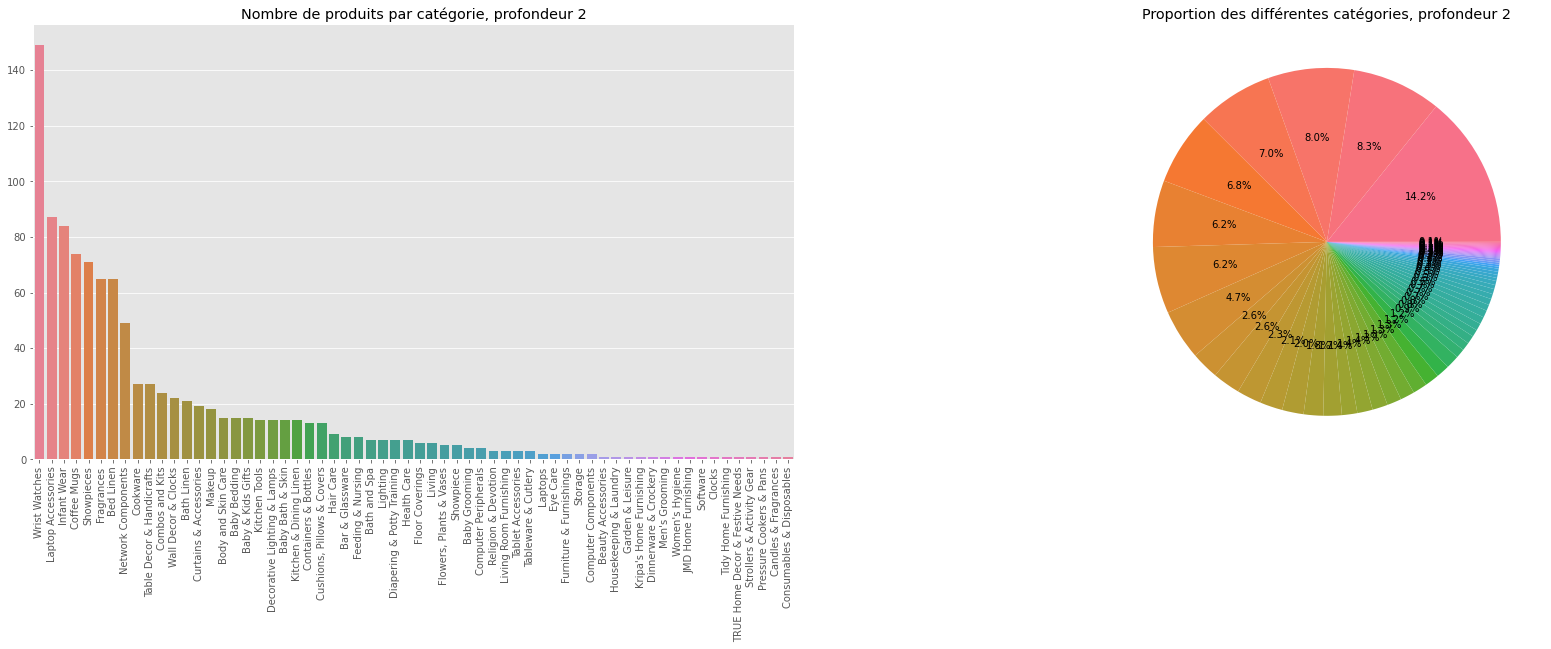

In [15]:
# Histogramme et Pieplot de la répartition des catégories dans la profondeur 2 : category_2
fig = plt.figure(1, figsize=(30, 8))
categories_2 = data["category_2"].value_counts()

plt.title("Proportion des différentes catégories")

sns.set_palette(sns.color_palette("husl", len(categories_2)))

# Barplot 
plt.subplot(1, 2, 1)
plt.title("Nombre de produits par catégorie, profondeur 2")

sns.barplot(categories_2.index, categories_2.values, orient="v")
plt.xticks(rotation=90)

# Pieplot
plt.subplot(1, 2, 2)
plt.title("Proportion des différentes catégories, profondeur 2")
plt.pie(categories_2, autopct='%1.1f%%')

plt.show()

## 1.4 Exemples d'image

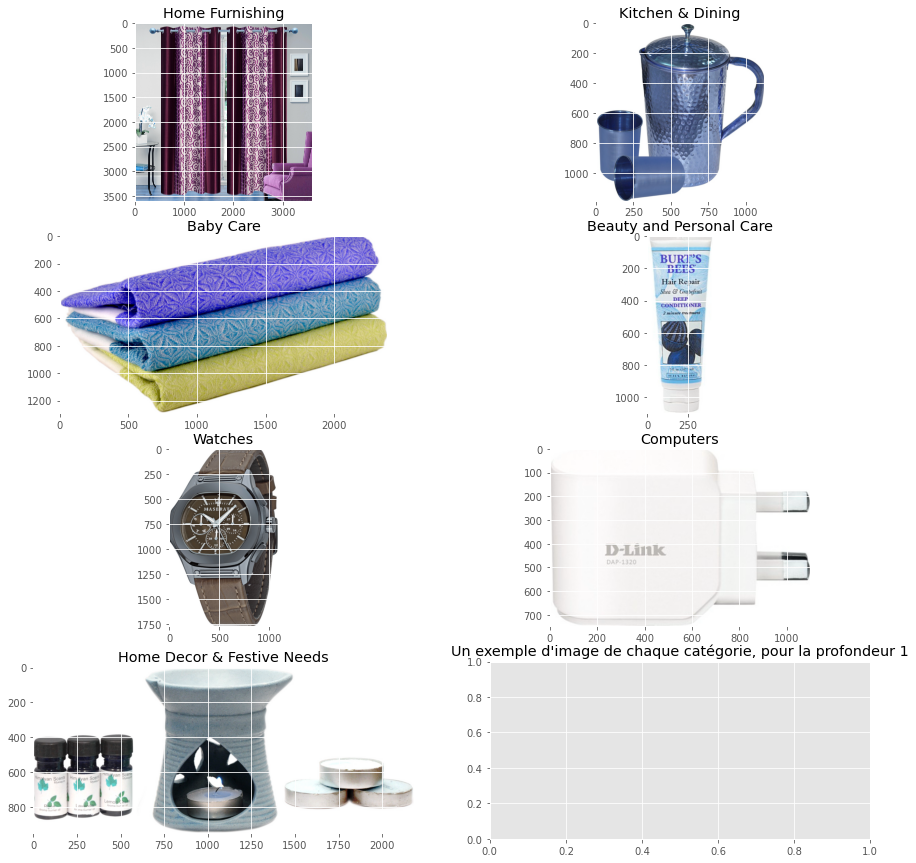

In [16]:
# Exemples d'image par catégories de produit
fig, ax = plt.subplots(4, 2)
fig.set_figheight(15)
fig.set_figwidth(15)

plt.title("Un exemple d'image de chaque catégorie, pour la profondeur 1")

for i, cat in enumerate(data['category_1'].unique()) :
    name_image = data[data['category_1'] == cat]["image"].iloc[0]
    full_path = os.path.join(path, name_image)
    img = cv2.imread(full_path)
    ax[i%4, i//4].set_title(cat)
    ax[i%4, i//4].imshow(img)
    
plt.show()

## 1.5 Analyse des descriptions des produits

In [17]:
print("La catégorie du produit est : {} \n".format(data['category_1'].iloc[0]))

print("La marque du produit est : {} \n".format(df["brand"].iloc[0]))

print("Le nom du produit est : {} \n".format(df["product_name"].iloc[0]))

print("Le descriptif du produit est : \n \n {}".format(df["description"].iloc[0]))

La catégorie du produit est : Home Furnishing 

La marque du produit est : Elegance 

Le nom du produit est : Elegance Polyester Multicolor Abstract Eyelet Door Curtain 

Le descriptif du produit est : 
 
 Elegance Polyester Multicolor Abstract Eyelet Door CurtainEleganceKey Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bri

In [18]:
description_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_category_tree  1050 non-null   object
 1   description            1050 non-null   object
dtypes: object(2)
memory usage: 16.5+ KB


C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


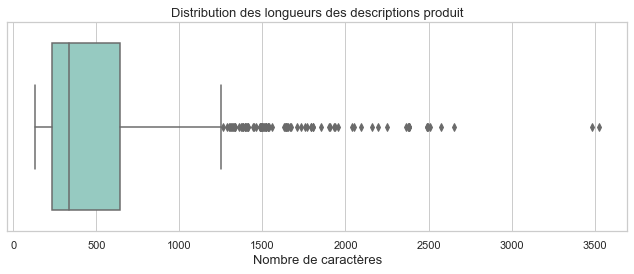

In [19]:
# Boxplot de la distribution des longueurs des descriptions produit
boxplot = description_category.copy()
description_category['description'] = description_category['description'].astype('U')
boxplot['len'] = description_category.description.apply(lambda x: len(x))

# Figure
sns.set(style="whitegrid",rc={"font.size":13,"axes.labelsize":13})
plt.figure(figsize=(9, 4))
ax = sns.boxplot(x='len', data=boxplot, orient="h", palette="Set3")
plt.ylabel('')
plt.xlabel('Nombre de caractères')
plt.title("Distribution des longueurs des descriptions produit", fontsize=13)
plt.tight_layout(h_pad=3)

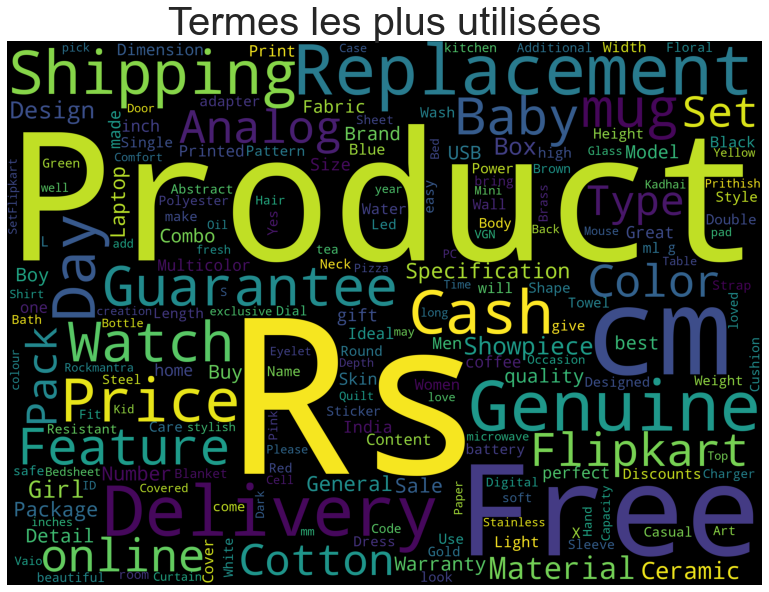

In [20]:
# Visualisation des mots les plus utilisés dans les descriptions

plt.figure(figsize=(20, 10))
text = description_category.description.values

cloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='black',
    collocations=False,
    width=2500,
    height=1800
).generate(" ".join(text))

plt.axis('off')
plt.title("Termes les plus utilisées", fontsize=40)
plt.imshow(cloud)

# 2. Données textuelles

## 2.1 Preprocessing

La première étape consiste à convertir les phrases de chaque description en tokens ou mots individuels.
Ces tokens subissent plusieurs traitements : retrait de la ponctuation, mise en minuscule, retrait des caractères spéciaux,...

In [21]:
# Phrases test à traiter
test = data['description'].iloc[0]
print(test)

Elegance Polyester Multicolor Abstract Eyelet Door CurtainEleganceKey Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the e

In [22]:
# Fonction de preprocessing des données textuelles

def tokenizer(text):
    """Tokenize a text into tokens"""
    tokenizer = RegexpTokenizer('\w+')
    tokens = tokenizer.tokenize(text)
    return tokens

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    # American Standard Code for Information Interchange
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all integer occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def no_alphabetic_removal(words):
    """Remove all tokens that are not alphabetic from list of tokenized words"""
    new_words = []
    for word in words:
        if word.isalpha():
            new_words.append(word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = SnowballStemmer("english")
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

# NN noun, singular 'desk'
# NNS noun plural 'desks'
# NNP proper noun, singular 'Harrison'
# NNPS proper noun, plural 'Americans'

def keep_nouns(words):
    """Keep only nouns words"""
    tags = nltk.pos_tag(words)
    new_words = [word for word,pos in tags if (pos == 'NN' or pos == 'NNP' or pos == 'NNS' or pos == 'NNPS')]
    return new_words

def remove_commun_word(words):
    """remove_commun_word"""
    freq = pd.Series(' '.join(words).split()).value_counts()[:5]
    new_words = []
    for word in words:
        if word not in freq:
            new_words.append(word)
    return new_words

def remove_rare_word(words):
    """remove_commun_word"""
    freq = pd.Series(' '.join(words).split()).value_counts()[-5:]
    new_words = []
    for word in words:
        if word not in freq:
            new_words.append(word)
    return new_words

def preprocessor(words):
    words = tokenizer(words)
    words = to_lowercase(words)
    words = remove_non_ascii(words)
    words = remove_punctuation(words)
    words = no_alphabetic_removal(words)
    words = remove_stopwords(words)
    words = keep_nouns(words)
   #words = remove_commun_word(words)
   #words = remove_rare_word(words)
    words = stem_words(words)  
    return words

In [23]:
# Validation du test
print('Nombre de tokens dans le test: {}'.format(len(preprocessor(test))), '\n')

for x in preprocessor(test):
    print(x, end=' ')

Nombre de tokens dans le test: 98 

eleg polyest multicolor eyelet door curtainelegancekey featur polyest multicolor eyelet door curtain eleg polyest multicolor eyelet door curtain cm price rs curtain enhanc interior qualiti polyest fabric featur style stitch metal room environ love curtain wrinkl shrinkag appar home bright appeal design attent heart eyelet valanc curtain thing morn bright sun ray morn world draw even creat moment beauti print home eleg curtain filter room amount specif eleg polyest multicolor eyelet door curtain cm brand eleg door type eyelet model name polyest door curtain model id color multicolor dimens cm box number content sale sale packag materi polyest 

In [24]:
data['description_clean'] = data['description'].apply(preprocessor)

In [25]:
data.head(3)

,category_1,category_2,description,image,description_clean
0,Home Furnishing,Curtains & Accessories,Elegance Polyester Multicolor Abstract Eyelet ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[eleg, polyest, multicolor, eyelet, door, curt..."
1,Baby Care,Baby Bath & Skin,Sathiyas Cotton Bath TowelSathiyasSpecificatio...,7b72c92c2f6c40268628ec5f14c6d590.jpg,"[cotton, bath, towelsathiyasspecif, cotton, ba..."
2,Baby Care,Baby Bath & Skin,Eurospa Cotton Terry Face Towel SetEurospaKey ...,64d5d4a258243731dc7bbb1eef49ad74.jpg,"[cotton, terri, face, towel, seteurospakey, co..."


## 2.2 Segmentation


### 2.2.1 Méthode BOW

L'étape suivante consiste à créer un dictionnaire contenant tous les mots de notre corpus sous forme de clés et la fréquence d'occurrence des mots en tant que valeurs. En d'autres termes, nous devons créer un histogramme des mots de notre corpus de texte.

In [26]:
# Vectorisation
countvectorizer = CountVectorizer(min_df=5)  # minimum number of documents that should contain a feature

In [27]:
# Dataframe sous forme de Bag of Words
BOW_array = countvectorizer.fit_transform(data['description_clean'].astype('U'))
tokens = countvectorizer.get_feature_names()
BOW_df = pd.DataFrame(BOW_array.toarray(), columns=tokens)
print(BOW_df.shape)
BOW_df.head(3)

(1050, 569)


,absorb,abstract,ac,accessori,adapt,adaptersmartprokey,addit,age,air,akup,...,women,womenmaxima,womensonata,wood,wooden,work,world,wrap,year,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


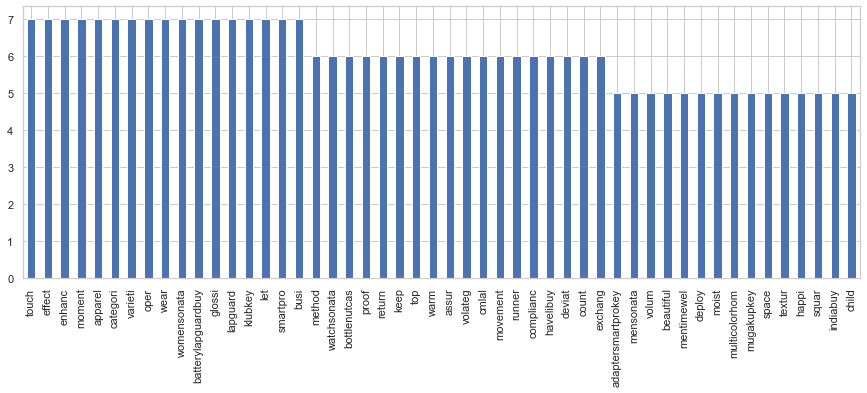

In [28]:
# Termes les moins fréquents dans l'ensemble des descriptions
BOW_df.sum(axis=0).sort_values(ascending=False)[-50:].plot.bar(figsize=(15,5))
plt.show()

(1050, 71)


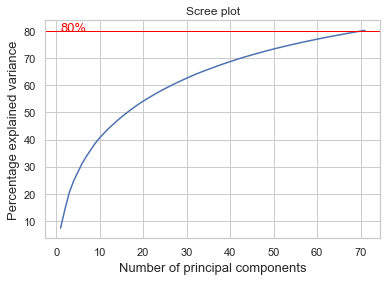

In [29]:
# Réduction PCA, 80% de variance expliqué 
pca = PCA(n_components=0.8, random_state=22)
pca.fit(BOW_df)
x = pca.transform(BOW_df)
print(x.shape)

# Scree plot
scree = pca.explained_variance_ratio_*100
plt.plot(np.arange(len(scree))+1, scree.cumsum()) #,c="red",marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Percentage explained variance")
plt.axhline(80, lw=1, c='red')
plt.text(1, 80, '80%', c='red')
plt.title("Scree plot")
plt.show(block=False)

# Réduction t-SNE
dict_tsne_results = {}
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=1)
tsne_results = tsne.fit_transform(x)
dict_tsne_results['text_BOW']=tsne_results

In [30]:
# Clustering
kmeans = KMeans(n_clusters=data['category_1'].nunique(),n_jobs=-1, random_state=22)
kmeans.fit(tsne_results)            
y_pred =  kmeans.labels_
dict_y_pred = {}
dict_y_pred['text_BOW'] = y_pred

C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


In [31]:
def visualisation(tsne_results, y_pred):    
    # Visualisation 2D de y_pred et y_true
    fig = plt.figure(1, figsize=(20, 8))
    plt.suptitle("Visualisation des clusters", fontsize=25, fontweight='bold')

    # Plot 1
    plt.subplot(1, 2, 1)

    X_normalized = MinMaxScaler().fit_transform(tsne_results)
    y_true =  data['category_1'].values

    cmap = plt.cm.get_cmap("jet")
    digits = np.unique(y_true)
    for i, digit in enumerate(digits):
        sns.scatterplot(X_normalized[y_true == digit, 0],
                        X_normalized[y_true == digit, 1],
                        c=[cmap(i / 7)],
                        label=digit)

    plt.xlabel("Composante 1")
    plt.ylabel("Composante 2")
    plt.title("y_true", fontsize=15)

    # Plot 2
    plt.subplot(1, 2, 2)

    cmap = plt.cm.get_cmap("jet")
    digits = np.unique(y_pred)
    for i, digit in enumerate(digits):
        sns.scatterplot(X_normalized[y_pred == digit, 0],
                        X_normalized[y_pred == digit, 1],
                        c=[cmap(i / 7)],
                        label=digit)

    plt.xlabel("Composante 1")
    plt.ylabel("Composante 2")
    plt.title("y_pred", fontsize=15)

    plt.show()

    result = adjusted_rand_score(data['category_1'], kmeans.labels_)
    print('ARI = {}'.format(result))

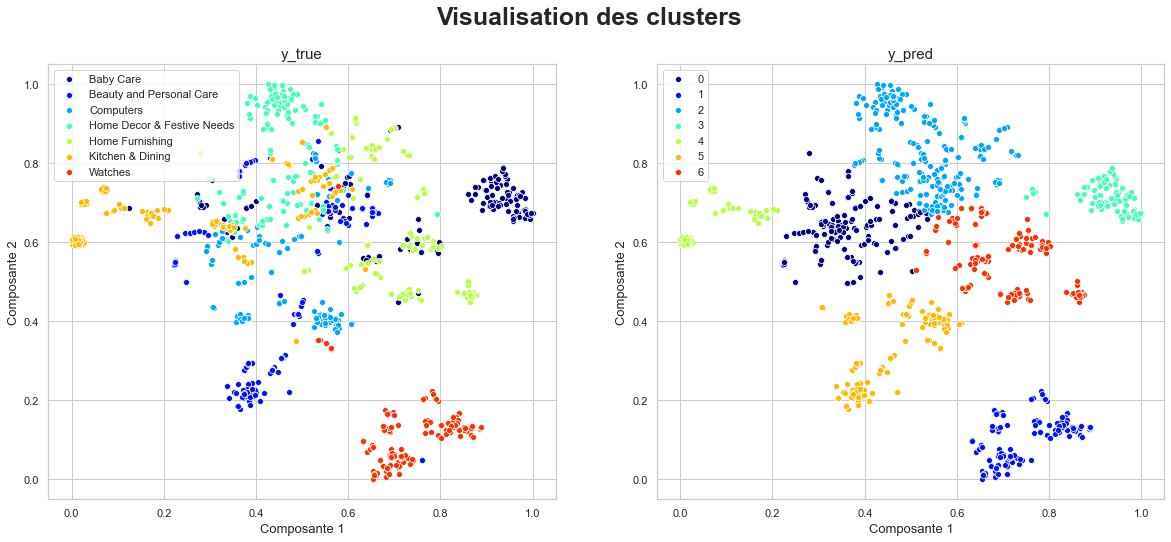

ARI = 0.35834250935152767


In [32]:
visualisation(tsne_results, y_pred)

In [33]:
ARI = {}
ARI["text_BOW"] = adjusted_rand_score(data['category_1'], kmeans.labels_)
print(ARI["text_BOW"])

0.35834250935152767


### 2.2.2 Méthode TF-IDF

In [34]:
# Vectorisation
tfidfvectorizer = TfidfVectorizer(max_features=800,
                                  min_df=5,
                                  max_df=0.7,
                                  stop_words=stopwords.words(
                                      'english'),
                                  tokenizer=preprocessor,
                                  token_pattern='[a-zA-Z0-9]{3,}')

In [35]:
# Dataframe sous forme TF-IDF
TF_IDF_array = tfidfvectorizer.fit_transform(data['description'].astype('U'))
tokens = tfidfvectorizer.get_feature_names()
TF_IDF_df = pd.DataFrame(TF_IDF_array.toarray(), columns=tokens)
print(TF_IDF_df.shape)
TF_IDF_df.head(3)

(1050, 575)


,absorb,abstract,ac,accessori,adapt,adaptersmartprokey,addit,age,air,akup,...,womenmaxima,womensonata,wood,wooden,work,world,wrap,x,year,yes
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.068038,0.0,0.000000,0.000000,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
2,0.073655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.045757,0.050697,0.0


(1050, 125)


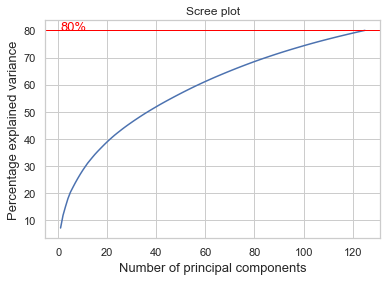

In [36]:
# Réduction PCA, 80% de variance expliqué 
pca = PCA(n_components=0.8, random_state=22)
pca.fit(TF_IDF_df)
x = pca.transform(TF_IDF_df)
print(x.shape)

# Scree plot
scree = pca.explained_variance_ratio_*100
plt.plot(np.arange(len(scree))+1, scree.cumsum()) #,c="red",marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Percentage explained variance")
plt.axhline(80, lw=1, c='red')
plt.text(1, 80, '80%', c='red')
plt.title("Scree plot")
plt.show(block=False)

# Réduction t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=1)
tsne_results = tsne.fit_transform(x)
dict_tsne_results['text_TF_IDF']=tsne_results

In [37]:
# Clustering
kmeans = KMeans(n_clusters=data['category_1'].nunique(),n_jobs=-1, random_state=22)
kmeans.fit(tsne_results)            
y_pred =  kmeans.labels_
dict_y_pred['text_TF_IDF'] = y_pred

C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


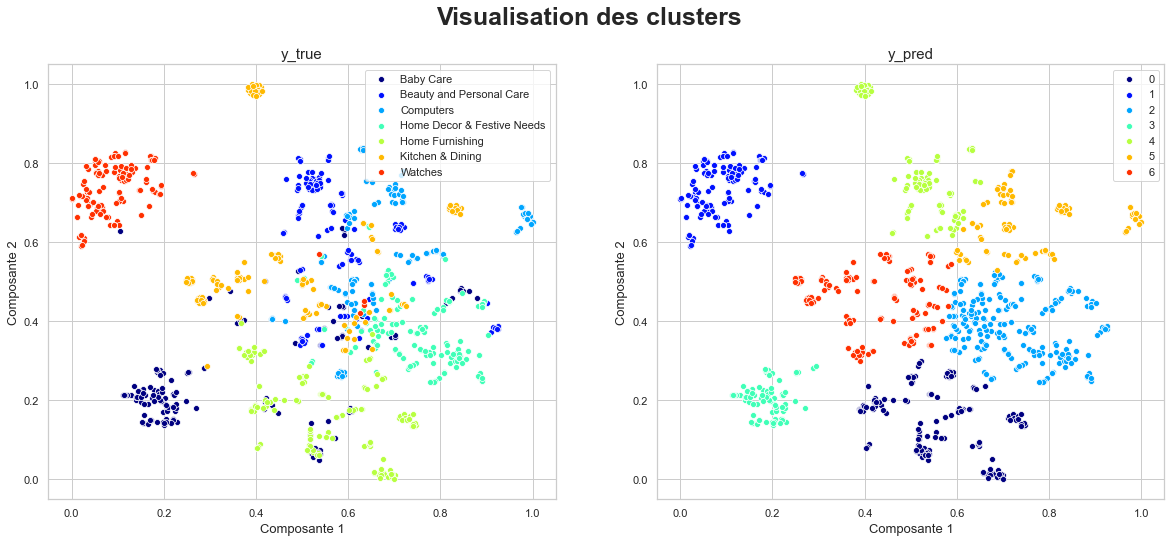

ARI = 0.4352880234581238


In [38]:
visualisation(tsne_results, y_pred)

In [39]:
ARI["text_TF_IDF"] = adjusted_rand_score(data['category_1'], kmeans.labels_)
print(ARI["text_TF_IDF"])

0.4352880234581238


### 2.2.3 Méthode BOW-LDA

In [40]:
# Modèle LDA
lda = LatentDirichletAllocation(n_components=data['category_1'].nunique())

In [41]:
# Pipeline Bag of Words + LDA
bow_lda_pipeline = Pipeline(steps=[
        ('BOW', countvectorizer), # Bag_of_words
        ('lda', lda),
        ])

In [42]:
# Array sous forme TF-IDF
LDA_array = bow_lda_pipeline.fit_transform(data['description'].astype('U'))
print(LDA_array.shape)

(1050, 7)


In [43]:
# Définition des topics
cv = countvectorizer.fit_transform(data["description"].values.astype('U'))
lda.fit(cv)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
no_top_words = 10
tf_feature_names = countvectorizer.get_feature_names()
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
only products free rs on delivery shipping genuine cash at
Topic 1:
mug ceramic is to it and coffee this your in
Topic 2:
of in with the skin warranty laptop pack set type
Topic 3:
of cm in the color inch package box features sales
Topic 4:
for watch analog only at replacement men in india rs
Topic 5:
and the to your is with for of you it
Topic 6:
baby of girl cotton details for fabric in ideal boy


In [44]:
# Réduction t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=1)
tsne_results = tsne.fit_transform(LDA_array)
dict_tsne_results['text_LDA']=tsne_results

In [45]:
# Clustering
kmeans = KMeans(n_clusters=data['category_1'].nunique(),n_jobs=-1, random_state=22)
kmeans.fit(tsne_results)            
y_pred =  kmeans.labels_
dict_y_pred['text_LDA'] = y_pred

C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


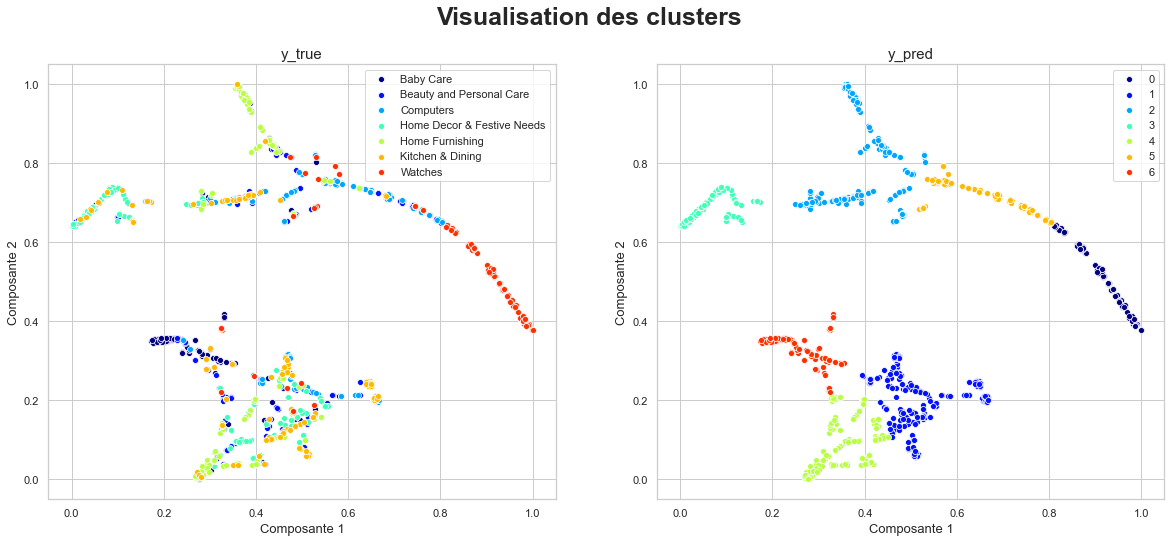

ARI = 0.22910601001521935


In [46]:
visualisation(tsne_results, y_pred)

In [47]:
ARI["text_LDA"] = adjusted_rand_score(data['category_1'], kmeans.labels_)
print(ARI["text_LDA"])

0.22910601001521935


### 2.2.4  Méthode TF-IDF + NMF

In [48]:
# Modèle NMF
nmf = NMF(n_components=data['category_1'].nunique())

In [49]:
# Pipeline Bag of Words + LDA
tfidf_nmf_pipeline = Pipeline(steps=[
        ('TF_IDF', tfidfvectorizer), # Bag_of_words
        ('nmf', nmf),
        ])

In [50]:
# Array sous forme TF-IDF
NMF_array = tfidf_nmf_pipeline.fit_transform(data['description'].astype('U'))

In [51]:
# Définition des topics
tfidf = tfidfvectorizer.fit_transform(data["description"].values.astype('U'))
nmf.fit(tfidf)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
              
no_top_words = 10
tf_feature_names = tfidfvectorizer.get_feature_names()
display_topics(nmf, tf_feature_names, no_top_words)

Topic 0:
watch analog men discount women ship flipkart strap com guarante
Topic 1:
com flipkart ship setflipkart cash deliveri guarante replac day product
Topic 2:
babi girl detail cotton dress boy neck shirt occas ideal
Topic 3:
showpiec cm onlin price guarante replac rs day cash deliveri
Topic 4:
mug coffe gift rockmantra design start creation one year x
Topic 5:
cm cushion color pack model box number design brand inch
Topic 6:
towel cotton bath genuin com product cash deliveri face hand


In [52]:
# Réduction t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=1)
tsne_results = tsne.fit_transform(NMF_array)
dict_tsne_results['text_NMF']=tsne_results

In [53]:
# Clustering
kmeans = KMeans(n_clusters=data['category_1'].nunique(),n_jobs=-1, random_state=22)
kmeans.fit(tsne_results)            
y_pred =  kmeans.labels_
dict_y_pred['text_NMF'] = y_pred

C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


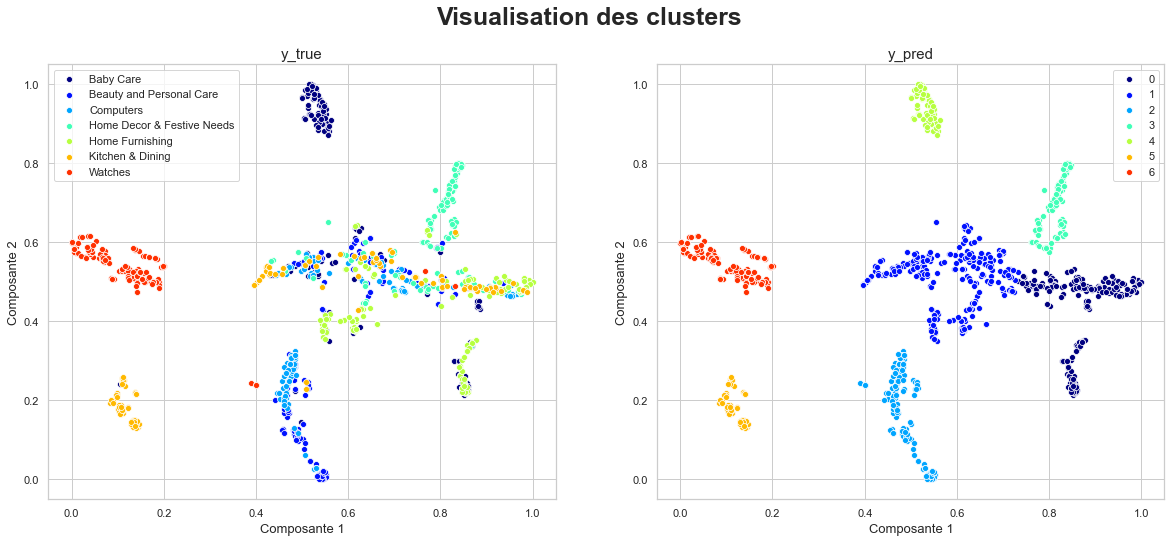

ARI = 0.31607471855900887


In [54]:
visualisation(tsne_results, y_pred)

In [55]:
ARI["text_NMF"] = adjusted_rand_score(data['category_1'], kmeans.labels_)
print(ARI["text_NMF"])

0.31607471855900887


# 3. Image Data

## 3.1 Bag Of Visual Words

La méthodoligie d'extraction de features par ORB se fait en 4 étapes :

- Récupérer les descripteurs de chaque image 
- Clusteriser l'ensemble de tous les descripteurs
- Associer les descripteurs de chaque image aux centres obtenus par clustering
- Faire un bag of words des descripteurs de chaque image, pour toutes les images

### 3.1.1 Preprocessing

In [56]:
# Fonction traitement des images

def resize_to_square(img, size):
    # get image dimensions
    h, w = img.shape[:2]
    
    # dif = max (height, width)
    dif = h if h > w else w
    
    # define interpolation for zooming and shrinkage
    interpolation = cv2.INTER_AREA if dif > size else cv2.INTER_CUBIC    
    
    # for square images
    if h == w: 
        return cv2.resize(img, (size, size), interpolation)
    
    # for non square images
    x_pos = (dif - w)//2
    y_pos = (dif - h)//2
    
    # define mask for both color and back and white images
    if len(img.shape) == 2:
        mask = np.full((dif, dif), 255, dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
    else:
        mask = np.full((dif, dif, img.shape[2]), 255, dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]
    
    return cv2.resize(mask, (size, size), interpolation)

clahe = cv2.createCLAHE(clipLimit=1, tileGridSize=(8,8)) 

def traitement_image(img):
    # conversion en noir et blanc
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Redimensionnement
    img_square = resize_to_square(img_gray, 400)
    # Amélioration du contraste
    cl = clahe.apply(img_square)  
    return cl

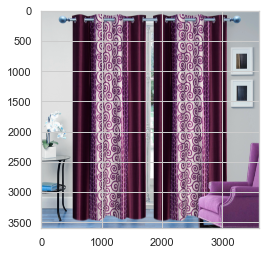

In [57]:
# Image test
image_path_test = data['image'][0]
im_test = cv2.imread(os.path.join(path, image_path_test))
plt.imshow(im_test)

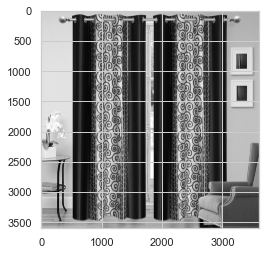

In [58]:
# Image test grisée
im_test_gray = cv2.cvtColor(im_test, cv2.COLOR_BGR2GRAY)
plt.imshow(im_test_gray, cmap='gray')

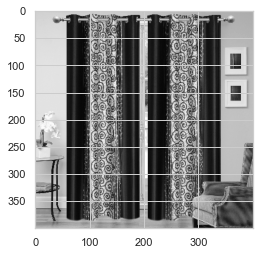

In [59]:
# Image test grisée et redimensionnée
im_test_reshaped = resize_to_square(im_test_gray, 400)
plt.imshow(im_test_reshaped, cmap='gray')

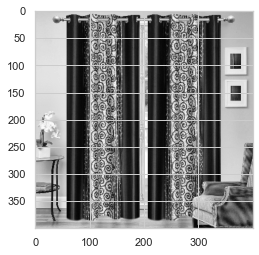

In [60]:
# Image test grisée, redimensionnée et avec constraste modifié
im_test_processed = clahe.apply(im_test_reshaped) 
plt.imshow(im_test_processed, cmap='gray')

### 3.1.2 Extraction des features

In [61]:
# Extraction des features de chaque image sous forme de liste
# Création d'une liste des noms des images

images = []
des_list = []
image_path_to_del = []

orb = cv2.ORB_create()

for image_path in data['image']:
    images.append(image_path)
    im = cv2.imread(os.path.join(path, image_path))
    im = traitement_image(im)
    kpts, des = orb.detectAndCompute(im, None)
    if des is not None : # Si descriptor est différent de None
        des_list.append((image_path, des))
    else :
        print("Descriptors of Image {} is None".format(image_path))
        image_path_to_del.append(image_path)

data_2 = data.drop(data[data['image']==image_path_to_del[0]].index)

Descriptors of Image 9743e6d1c9f3180483825fe4d2e97836.jpg is None


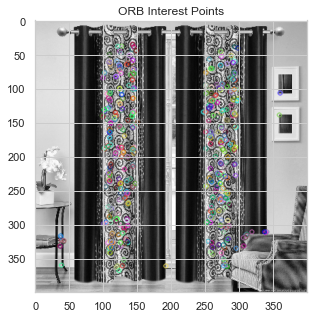

In [62]:
# Extraction des features sur image_test
key_points, description = orb.detectAndCompute(im_test_processed, None)
img_building_keypoints = cv2.drawKeypoints(im_test_processed, 
                                           key_points, 
                                           im_test_processed, )
                                           #flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw circles.
plt.figure(figsize=(5, 5))
plt.title('ORB Interest Points')
plt.imshow(img_building_keypoints); plt.show()

### 3.1.3 Stacking

In [63]:
# Empillement vertical des descriptors dans un numpy array
descriptors = des_list[0][1]
for image_path, descriptor in des_list[1:] :
    descriptors = np.vstack((descriptors, descriptor))  

descriptors_float = descriptors.astype(float)  
print(descriptors_float)

[[ 85. 221.  29. ... 250. 161.  49.]
 [126. 146. 224. ... 175.  60. 214.]
 [124.  33. 145. ...  66. 135. 195.]
 ...
 [ 15.  28.  54. ... 231. 105. 149.]
 [ 21.  62.  87. ... 237. 104. 149.]
 [140.  23. 119. ... 207. 117. 243.]]


In [64]:
print(descriptors_float.shape)
print(descriptors_float)

(496568, 32)
[[ 85. 221.  29. ... 250. 161.  49.]
 [126. 146. 224. ... 175.  60. 214.]
 [124.  33. 145. ...  66. 135. 195.]
 ...
 [ 15.  28.  54. ... 231. 105. 149.]
 [ 21.  62.  87. ... 237. 104. 149.]
 [140.  23. 119. ... 207. 117. 243.]]


In [66]:
# Construction des Bags Of Visual Words / histogramme prenant la forme d'une matrice
from scipy.cluster.vq import kmeans, vq

BOVW = {}
n_clusters = [100, 200, 300]

for n in n_clusters:
    voc, variance = kmeans(descriptors_float, n, 1) 
    print(n)
    
    BOVW[n] = np.zeros((len(des_list), n), "float32")
    for i in range(len(des_list)):
        words, distance = vq(des_list[i][1],voc)
        for w in words:
            BOVW[n][i][w] += 1
    print('BovW ok')

100
BovW ok
200
BovW ok
300
BovW ok


(1049, 38)


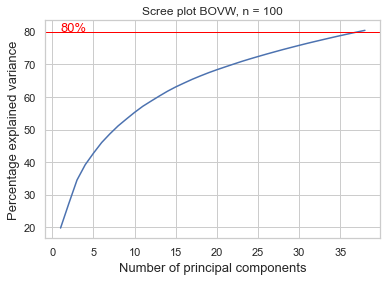

(1049, 76)


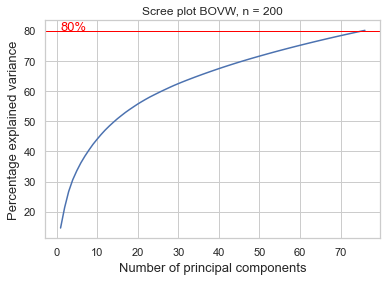

(1049, 115)


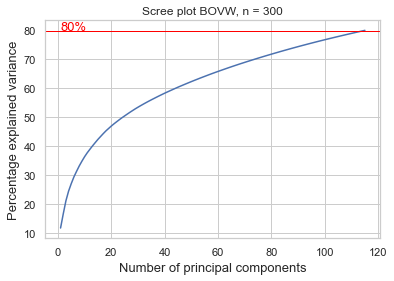

In [67]:
# Réduction PCA / t-SNE des BOVW

tsne_results_BOVW = {}

for key, value in BOVW.items():
    pca = PCA(n_components=0.8, random_state=22)
    pca.fit(value)
    x = pca.transform(value)
    print(x.shape)

    # Scree plot
    scree = pca.explained_variance_ratio_*100
    plt.plot(np.arange(len(scree))+1, scree.cumsum()) #,c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.axhline(80, lw=1, c='red')
    plt.text(1, 80, '80%', c='red')
    plt.title("Scree plot BOVW, n = {}".format(key))
    plt.show(block=False)

    tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=1)
    tsne_results = tsne.fit_transform(x)
    
    tsne_results_BOVW[key] = tsne_results

In [70]:
score = {}
labels = {}

for key, value in tsne_results_BOVW.items():

    kmeans = KMeans(n_clusters=data_2['category_1'].nunique(),n_jobs=-1, random_state=22)
    kmeans.fit(value)
    labels[key]=kmeans.labels_
    print('nombre de visual words = {}'.format(key))
    score[key] = adjusted_rand_score(data_2['category_1'], kmeans.labels_)
    print('ARI = {}'.format(score[key]))
    print('\n')

C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)
C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


nombre de visual words = 100
ARI = 0.030984637608524854


nombre de visual words = 200
ARI = 0.030595298222552567


nombre de visual words = 300
ARI = 0.024874292963477897




In [71]:
# Clé du dict score avec valeur maximale
key_max = max(score, key=score.get)
print('ARI_max = {}'.format(score[key_max]))

ARI_max = 0.030984637608524854


In [72]:
# Stockage du résultat
dict_y_pred['img_BOVW'] = labels[key_max]

In [73]:
dict_tsne_results['img_BOVW']=tsne_results_BOVW[key_max]

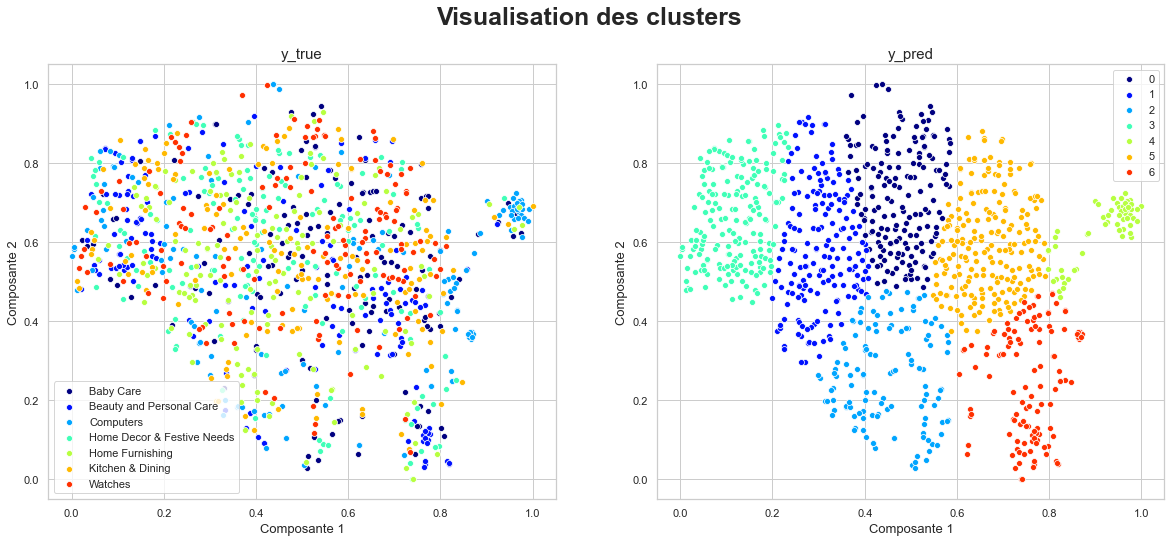

ARI = 0.030984637608524854


In [74]:
# Visualisation 2D de y_pred et y_true
fig = plt.figure(1, figsize=(20, 8))
plt.suptitle("Visualisation des clusters", fontsize=25, fontweight='bold')

# Plot 1
plt.subplot(1, 2, 1)

X_normalized = MinMaxScaler().fit_transform(tsne_results_BOVW[key_max])
y_true =  data_2['category_1'].values

cmap = plt.cm.get_cmap("jet")
digits = np.unique(y_true)
for i, digit in enumerate(digits):
    sns.scatterplot(X_normalized[y_true == digit, 0],
                    X_normalized[y_true == digit, 1],
                    c=[cmap(i / 7)],
                    label=digit)

plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("y_true", fontsize=15)

# Plot 2
plt.subplot(1, 2, 2)

cmap = plt.cm.get_cmap("jet")
digits = np.unique(y_pred)
for i, digit in enumerate(digits):
    sns.scatterplot(X_normalized[labels[key_max] == digit, 0],
                    X_normalized[labels[key_max] == digit, 1],
                    c=[cmap(i / 7)],
                    label=digit)

plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("y_pred", fontsize=15)

plt.show()

result = adjusted_rand_score(data_2['category_1'], labels[key_max])
print('ARI = {}'.format(result))

In [75]:
ARI["img_BOVW"] = result
print(ARI["img_BOVW"])

0.030984637608524854


## 3.2 Transfer Learning 1

In [76]:
# Modèle VGG16
model = VGG16()

# remove the output layer
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)

In [77]:
path = r"C:/Users/valen/images"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
images = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file is not None:
            images.append(file.name)

In [78]:
images[0:15]

['009099b1f6e1e8f893ec29a7023153c4.jpg',
 '0096e89cc25a8b96fb9808716406fe94.jpg',
 '00cbbc837d340fa163d11e169fbdb952.jpg',
 '00d84a518e0550612fcfcba3b02b6255.jpg',
 '00e966a5049a262cfc72e6bbf68b80e7.jpg',
 '00ed03657cedbe4663eff2d7fa702a33.jpg',
 '01089dc3618a0ab7304d784ef400b83d.jpg',
 '0131e5d87b72877702d536299cf83b75.jpg',
 '020d2daba55a723128e4e07c0b0393a9.jpg',
 '02127f52e96fb72c66bf081d25104ef8.jpg',
 '025a85a3d1cddc6307f7dc075d8d2132.jpg',
 '02a53d335775b652f22f41b529b9d646.jpg',
 '02c63a087b298ec74042d557acf61be1.jpg',
 '031c98cfde349d99fb6d5983f54c8751.jpg',
 '032e812adcd11a38fd8b764891a852ff.jpg']

### 3.2.1 Extraction des features

In [79]:
# Fonction d'extraction des features
def extract_features(file, model):
    
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224)) # VGG model expects the images it receives to be 224x224 NumPy arrays
    
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [80]:
dictionary = {}

# Itération à travers la liste d'image
for image in images:
    # Extraction des features et ajout aux dictionnaire
    feat = extract_features(image,model)
    dictionary[image] = feat
        
# Liste des noms de fichiers
filenames = np.array(list(dictionary.keys()))

# Liste des features
feat = np.array(list(dictionary.values()))
print(feat.shape)
print(feat)

C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\Image.py:2837: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


(1050, 1, 4096)
[[[2.59189    2.7260034  0.         ... 0.8690458  0.         2.940915  ]]

 [[0.         0.         0.         ... 0.         0.15719423 2.9145613 ]]

 [[0.         0.         0.         ... 0.7088124  0.         0.        ]]

 ...

 [[0.         0.         1.4333732  ... 0.         0.         0.07515043]]

 [[0.98796195 1.8043739  0.         ... 0.         0.         0.        ]]

 [[0.974502   5.987943   0.         ... 0.         0.         4.0826144 ]]]


In [81]:
# reshape so that there are 1050 samples of 4096 vectors
feat = feat.reshape(-1,4096)
print(feat.shape)

(1050, 4096)


### 3.2.2 Réduction

(1050, 147)


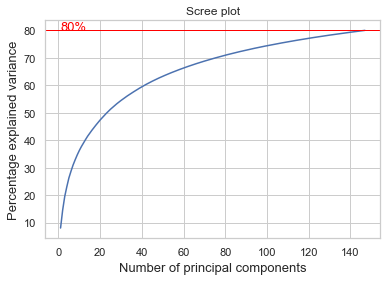

In [82]:
# Réduction PCA, 80% de variance expliqué 
pca = PCA(n_components=0.8, random_state=22)
pca.fit(feat)
x = pca.transform(feat)
print(x.shape)

# Scree plot
scree = pca.explained_variance_ratio_*100
plt.plot(np.arange(len(scree))+1, scree.cumsum()) #,c="red",marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Percentage explained variance")
plt.axhline(80, lw=1, c='red')
plt.text(1, 80, '80%', c='red')
plt.title("Scree plot")
plt.show(block=False)

# Réduction t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=1)
tsne_results = tsne.fit_transform(x)

### 3.2.3 Clustering

In [83]:
# Clustering
kmeans = KMeans(n_clusters=data['category_1'].nunique(),n_jobs=-1, random_state=22)
kmeans.fit(tsne_results)            
y_pred =  kmeans.labels_

C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


### 3.2.4 Visualisation

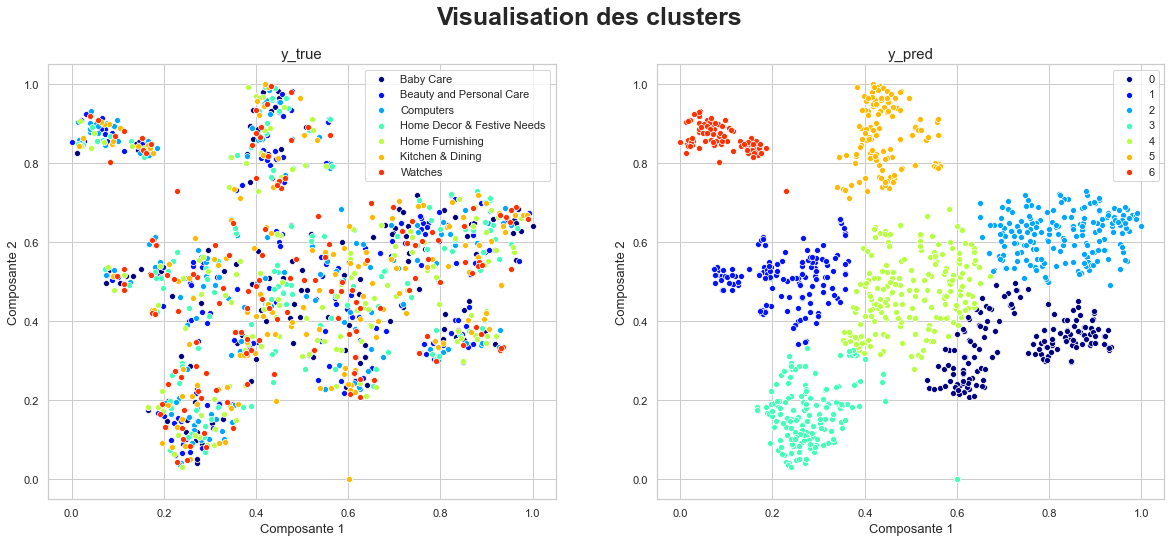

ARI = -0.0006526501810823768


In [84]:
visualisation(tsne_results, y_pred)

## 3.3 Transfer Learning 2

In [85]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.applications.vgg16 import preprocess_input

In [86]:
def traitement_image_VGG16(img):
    # load the image as a 224x224 array
    img = load_img(img, target_size=(224,224)) # VGG model expects the images it receives to be 224x224 NumPy arrays
    
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    img = img.reshape(1,224,224,3) 
    
    # prepare image for model
    img = preprocess_input(img)
    
    return img

In [87]:
data['process_VGG16'] = data['image'].apply(traitement_image_VGG16)

C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\PIL\Image.py:2837: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


In [88]:
X = data['process_VGG16'].loc[0]
for row in data['process_VGG16'][1:]:
    X = np.concatenate((X,row), axis=0)
X.shape

(1050, 224, 224, 3)

In [89]:
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Récupérer la sortie de ce réseau et le transformer en vecteur
x = base_model.output
x = Flatten()(x)

# Définir le nouveau modèle
f_model = Model(inputs=base_model.input, outputs=x)

In [90]:
features = pd.DataFrame(f_model.predict(X))
print(features.shape)

(1050, 25088)


(1050, 392)


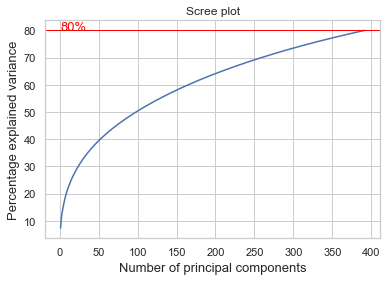

In [91]:
# Réduction PCA, 80% de variance expliqué 
pca = PCA(n_components=0.8, random_state=22)
pca.fit(features)
x = pca.transform(features)
print(x.shape)

# Scree plot
scree = pca.explained_variance_ratio_*100
plt.plot(np.arange(len(scree))+1, scree.cumsum()) #,c="red",marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Percentage explained variance")
plt.axhline(80, lw=1, c='red')
plt.text(1, 80, '80%', c='red')
plt.title("Scree plot")
plt.show(block=False)

# Réduction t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=1)
tsne_results = tsne.fit_transform(x)
dict_tsne_results['img_VGG']=tsne_results

In [92]:
# Clustering
kmeans = KMeans(n_clusters=data['category_1'].nunique(),n_jobs=-1, random_state=22)
kmeans.fit(tsne_results)            
y_pred =  kmeans.labels_

# Stockage du résultat
dict_y_pred['img_VGG'] = y_pred

C:\Users\valen\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:974: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


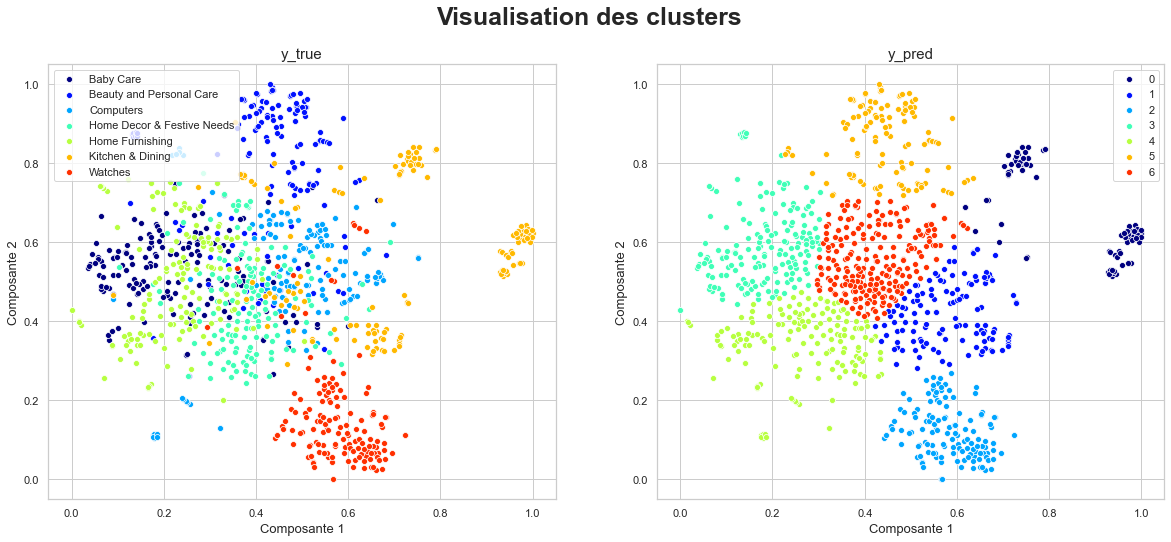

ARI = 0.3287920923830856


In [93]:
visualisation(tsne_results, y_pred)

In [94]:
ARI["img_VGG"] = adjusted_rand_score(data['category_1'], kmeans.labels_)
print(ARI["img_VGG"])

0.3287920923830856


# 4. Résultats

## 4.1 ARI

Text(0.5, 1.0, 'Résultats des différentes méthodologies')

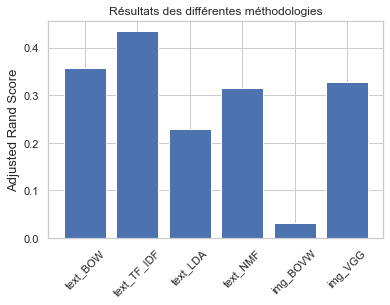

In [95]:
# Bar plot ARI pour tous les modèles
plt.bar(range(len(ARI)), list(ARI.values()), align='center')
plt.xticks(range(len(ARI)), list(ARI.keys()), rotation=45)
plt.ylabel('Adjusted Rand Score')
plt.title("Résultats des différentes méthodologies")

## 4.2 Matrice de confusion

In [96]:
ARI

{'text_BOW': 0.35834250935152767,
 'text_TF_IDF': 0.4352880234581238,
 'text_LDA': 0.22910601001521935,
 'text_NMF': 0.31607471855900887,
 'img_BOVW': 0.030984637608524854,
 'img_VGG': 0.3287920923830856}

In [97]:
# Clé du dict ARI avec valeur maximale
key_max = max(ARI, key=ARI.get)

index: ['Baby Care' 'Beauty and Personal Care' 'Computers'
 'Home Decor & Festive Needs' 'Home Furnishing' 'Kitchen & Dining'
 'Watches']
columns: range(0, 7)


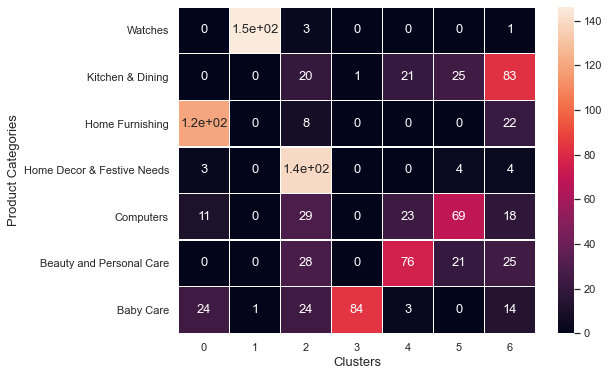

In [98]:
# Les catégories d'images sont encodés numériquement de 0 à 6
cat_encoder = LabelEncoder()
y_true = cat_encoder.fit_transform(data['category_1'])

# Labels prédits par le meilleur algorithme

y_pred = dict_y_pred[key_max] # Résultats VGG16

# Calcul de la Matrice de confusion
mat_conf = confusion_matrix(y_true, y_pred)

# Mise sous forme de DataFrame
mat_conf_df = pd.DataFrame(mat_conf, index=cat_encoder.classes_, columns=range(
    len(data['category_1'].unique())))
print('index: {}'.format(cat_encoder.classes_))
print('columns: {}'.format(range(len(data['category_1'].unique()))))

# Figure de la matrice de confusion
fig = plt.figure(1, figsize=(8, 6))
sns.heatmap(mat_conf_df, annot=True, linewidths=.3)
plt.ylabel('Product Categories')
plt.xlabel('Clusters')
plt.ylim(0, 7)
plt.show()

In [99]:
# Fonction permettant de corriger la correspondance entre 
# y_true et y_pred de notre matrice de confusion

# La permutation entraine une maximalisation de
# la somme des élements de la diagonale

from munkres import Munkres # Hungarian method

def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    assert(l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1 == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2 == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)


classes = y_true # data and true labels
labels = y_pred # performs the algo and get the predicted labels
num_labels = len(np.unique(y_true))

cm = confusion_matrix(classes, labels, labels=range(num_labels)) # gets the confusion matrix

cost_matrix = make_cost_matrix(labels, classes)

m = Munkres()
indexes = m.compute(cost_matrix)
mapper = { old: new for (old, new) in indexes }

new_labels = translate_clustering(labels, mapper)
new_cm = confusion_matrix(classes, new_labels, labels=range(num_labels))

Accuracy = 0.07523809523809524


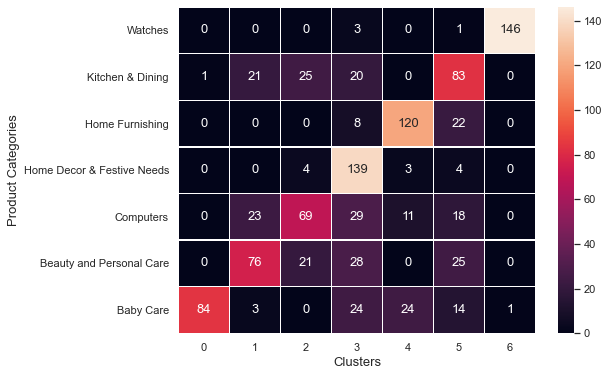

In [100]:
from sklearn.metrics import accuracy_score

new_cm_df = pd.DataFrame(new_cm, index=cat_encoder.classes_, columns=range(len(data['category_1'].unique())))

print('Accuracy = {}'.format(accuracy_score(y_true, y_pred, normalize=True)))

# Tracage de la matrice de confusion
fig = plt.figure(1, figsize=(8, 6))
sns.heatmap(new_cm_df, annot=True, linewidths=.3, fmt='d')
plt.ylabel('Product Categories')
plt.xlabel('Clusters')
plt.ylim(0, 7)
plt.show()

## 4.3 Affichage des images sur la projection t-SNE

In [101]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def plot_embedding(X, images, title=None, zoom=0.5, min_dist=5e-3):
    # recentrage des données
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    fig = plt.figure(figsize=(18, 12))
    ax = fig.add_subplot(1, 1, 1)
    ax.scatter(X[:, 0], X[:, 1], marker='.', c=color)

    shown_images = np.array([[1., 1.]])
    for i in range(X.shape[0]):
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        # ne pas afficher toutes les images
        if np.min(dist) < min_dist:
            continue
        shown_images = np.r_[shown_images, [X[i]]]
        props = {'boxstyle' : 'square, pad=0.1', 'edgecolor' : color[i]}
        imagebox = AnnotationBbox(OffsetImage(images[i], zoom=zoom), X[i], bboxprops=props)
        ax.add_artist(imagebox)
        
    if title is not None:
        ax.set_title(title, weight='bold', fontsize=14)

In [103]:
# Affectation d'une couleur par catégorie de produits
list_colors = ['mediumblue','crimson','lightgreen','mediumpurple','pink','darkturquoise','orange']
list_cat = data['category_1'].unique().tolist()
dict_color = {}
i=0
for cat in list_cat:
    dict_color[cat]=list_colors[i]
    i+=1
dict_color

{'Home Furnishing': 'mediumblue',
 'Baby Care': 'crimson',
 'Watches': 'lightgreen',
 'Home Decor & Festive Needs': 'mediumpurple',
 'Kitchen & Dining': 'pink',
 'Beauty and Personal Care': 'darkturquoise',
 'Computers': 'orange'}

In [104]:
# Chargement et traitement des images sous forme de colonne dataframe
def load_image(file_name):
    file_path = '/'.join((path,file_name))
    return cv2.imread(file_path)

data['process_img'] = data['image'].apply(load_image)
data['process_img'] = data['process_img'].apply(traitement_image)

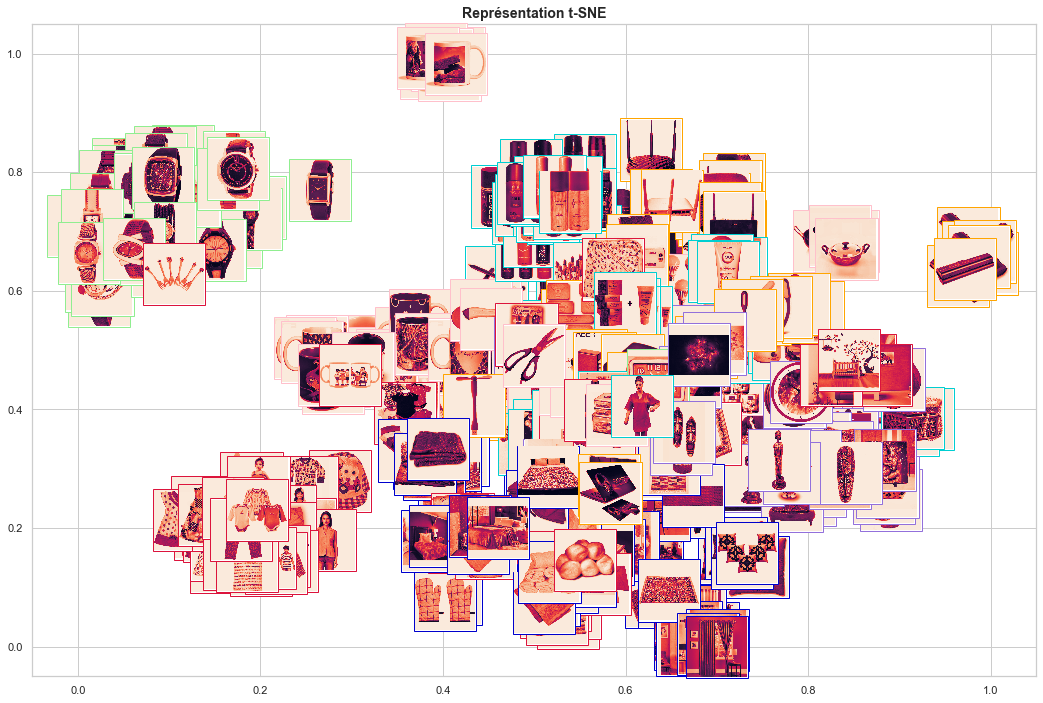

In [105]:
color = data['category_1'].apply(lambda x : dict_color[x])

plot_embedding(dict_tsne_results[key_max], data['process_img'], zoom=0.15, min_dist=10e-5, title='Représentation t-SNE')
#plt.ylim(-.05,0.8)
#plt.xlim(0.4,1)
plt.show()